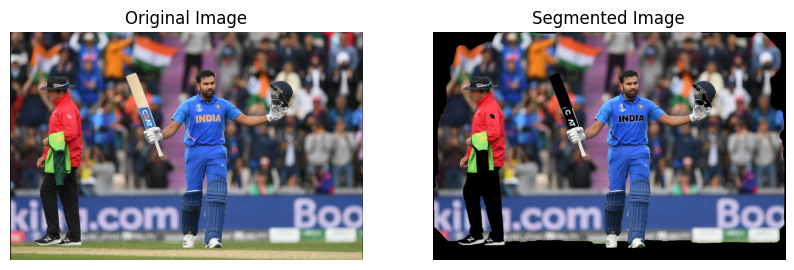

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
def graph_cut_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read image. Check the path.")
        return

    # Convert BGR to RGB for proper Matplotlib display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a mask and initialize models
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model, fgd_model = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

    # Define bounding box for rough segmentation
    rect = (4, 4, image.shape[1] - 10, image.shape[0] - 10)

    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create binary mask (background = 0, foreground = 1)
    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply mask to extract foreground
    result = image * mask[:, :, np.newaxis]

    # Convert result to RGB for correct display
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Print image using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)
    plt.title("Segmented Image")
    plt.axis("off")

    plt.show()

# --- Provide the image path here ---
image_path = "E:/murugesan/Downloads/cri.png"  # Change this to your actual image path
graph_cut_segmentation(image_path)


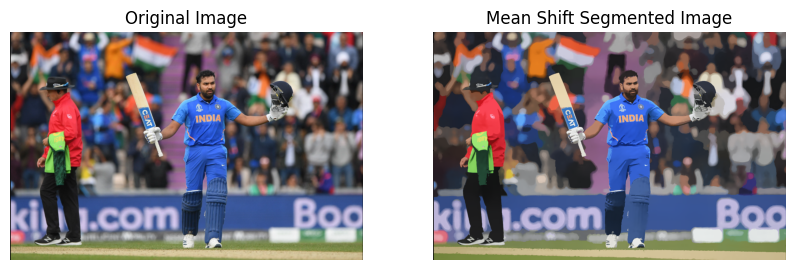

In [2]:


def mean_shift_segmentation(image_path, spatial_radius=30, color_radius=30, max_level=2):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read image. Check the path.")
        return

    # Convert image to RGB (for correct Matplotlib display)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Mean Shift filtering
    shifted = cv2.pyrMeanShiftFiltering(image, sp=spatial_radius, sr=color_radius, maxLevel=max_level)

    # Convert the segmented image to RGB for proper display
    shifted_rgb = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

    # Display original and segmented images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(shifted_rgb)
    plt.title("Mean Shift Segmented Image")
    plt.axis("off")

    plt.show()


mean_shift_segmentation(image_path)


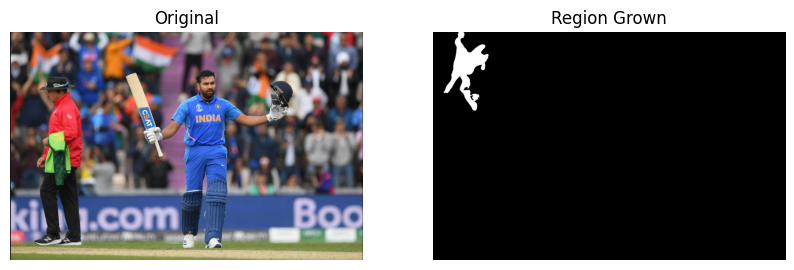

In [7]:
 
def region_growing(image_path, seed=(100, 100), threshold=70):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    region = np.zeros_like(gray)
    visited = np.zeros_like(gray, dtype=bool)
    
    stack = [seed]
    seed_intensity = gray[seed]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue

        visited[x, y] = True
        if abs(int(gray[x, y]) - int(seed_intensity)) <= threshold:
            region[x, y] = 255
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                if 0 <= x + dx < gray.shape[0] and 0 <= y + dy < gray.shape[1]:
                    stack.append((x + dx, y + dy))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis("off"), plt.title("Original")
    plt.subplot(1, 2, 2), plt.imshow(region, cmap="gray"), plt.axis("off"), plt.title("Region Grown")
    plt.show()

# Example Usage:
region_growing(image_path)


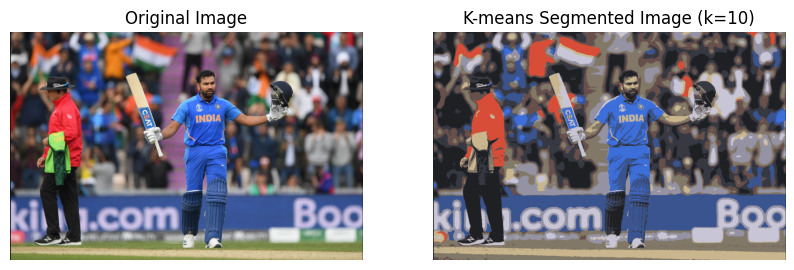

In [9]:

from sklearn.cluster import KMeans

# Load the image
image_path = "E:/murugesan/Downloads/cri.png"
image = cv2.imread(image_path)

# Convert the image to RGB (as OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels (each row is a pixel, each column is a color channel)
pixels = image_rgb.reshape((-1, 3))

# Apply KMeans clustering
k = 10 # Number of clusters (you can change this)
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Get the labels (which cluster each pixel belongs to)
labels = kmeans.labels_

# Get the cluster centers (the RGB values of the clusters)
centroids = kmeans.cluster_centers_

# Map the labels to the cluster centers (to assign each pixel to the color of its cluster)
segmented_image = centroids[labels].reshape(image_rgb.shape)

# Display the original and segmented images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(int))
plt.title(f"K-means Segmented Image (k={k})")
plt.axis('off')

plt.show()


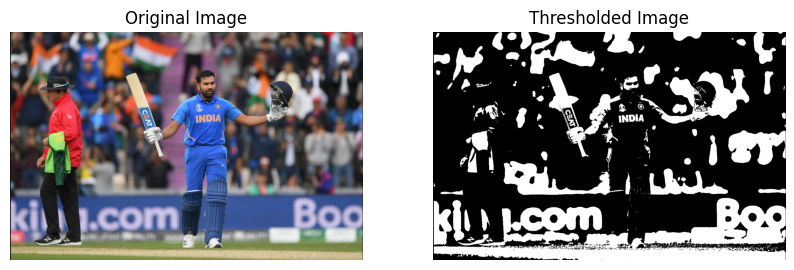

In [13]:
image_path = "E:/murugesan/Downloads/cri.png"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the threshold value
threshold_value = 127

# Apply the binary thresholding
_, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Thresholded image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

plt.show()
